In [1]:
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

## Importing Data

**1. Negative of an image**

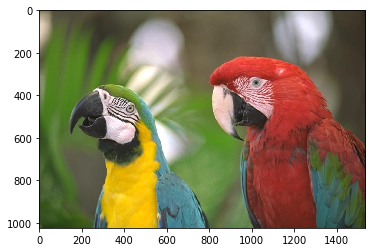

In [2]:
im = Image.open('Data/Parrot.jpg')

plt.imshow(im)

In [3]:
# Getting the coords/size/shape of the image
img_height, img_width = im.size

In [4]:
print(f"Height, Width : {img_height, img_width}")

Height, Width : (1536, 1024)


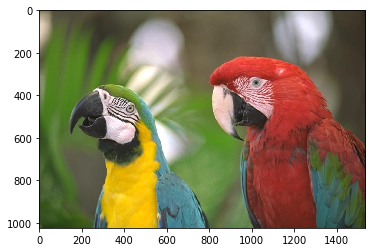

In [6]:
# Converting the image to array
img = np.array(im)

plt.imshow(img)

In [9]:
# Getting the max value of the image
img_max = np.max(img)
print(f"Max value : {img_max}")

Max value : 255


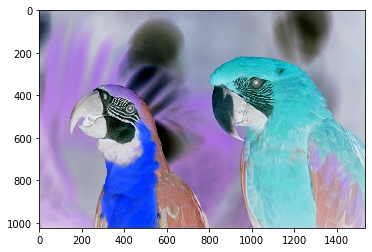

In [10]:
# Taking the negative
img_neg = img_max - img
plt.imshow(img_neg)

**2. Log Transform**

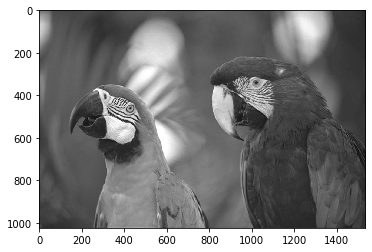

In [12]:
# Coverting to WB
img_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_g, cmap='gray')

In [14]:
# Checking the shape
img_g.shape

(1024, 1536)

C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


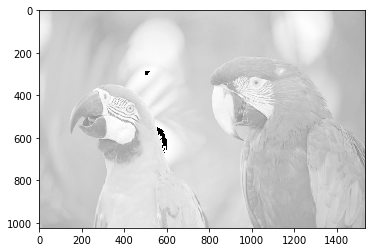

In [25]:
# Taking the log transform
'''
c = constant
s = c log(r + 1).
Where s and r are the pixel values of the output and the input image and c is a constant. 
The value 1 is added to each of the pixel value of the input image because if there is a pixel intensity of 0 in the image, then log (0) is equal to infinity. 
So 1 is added, to make the minimum value at least 1.
'''
c = 255/(np.log(1 + np.max(img_g))) 
img_lt = c * np.log(1 + img_g)

# Coverting back to INT
img_lt = np.array(img_lt, dtype = np.uint8)
plt.imshow(img_lt, cmap='gray')

**3. Histogram**

* Histogram of RGB Channels

In [58]:
# Making a function
def plot_hist(im, im_eq):
    # To split the RGB image into 3 channels
    # Original
    im_r = im[:, 0]
    im_g = im[:, 1]
    im_b = im[:, 2]
    
    # Equalized
    im_r_eq = im_eq[:, 0]
    im_g_eq = im_eq[:, 1]
    im_b_eq = im_eq[:, 2]
    
    # To create a plot
    plt.style.use('ggplot')
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(im, cmap='gray')
    plt.title('original image', size=10)
    plt.axis('off')
    plt.subplot(122)

    # Use the function here to plot histogram of im_r
    plt.hist(im_r)

    # Use the function here to plot histogram of im_g
    plt.hist(im_g)

    # Use the function here to plot histogram of im_b
    plt.hist(im_b)
    
    plt.xlabel('pixel value', size=10)
    plt.ylabel('frequency', size=10)
    plt.title('Histogram for RGB channels', size=10)
    
    # To create a plot
    plt.style.use('ggplot')
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(im_eq, cmap='gray')
    plt.title('equalized image', size=10)
    plt.axis('off')
    plt.subplot(122)

    # Use the function here to plot histogram of im_r
    plt.hist(im_r_eq)

    # Use the function here to plot histogram of im_g
    plt.hist(im_g_eq)

    # Use the function here to plot histogram of im_b
    plt.hist(im_b_eq)

    plt.xlabel('pixel value', size=10)
    plt.ylabel('frequency', size=10)
    plt.title('Histogram for RGB channels', size=10)
    plt.show()

In [59]:
# Getting the normal Histogram
# plot_hist(img)

* Histogram Equalization

C:\Users\varun\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


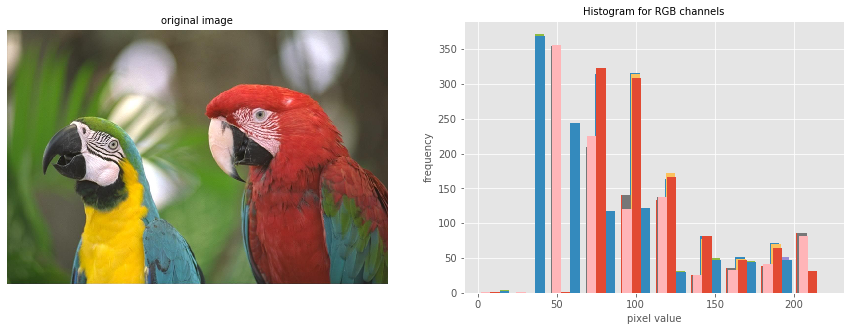

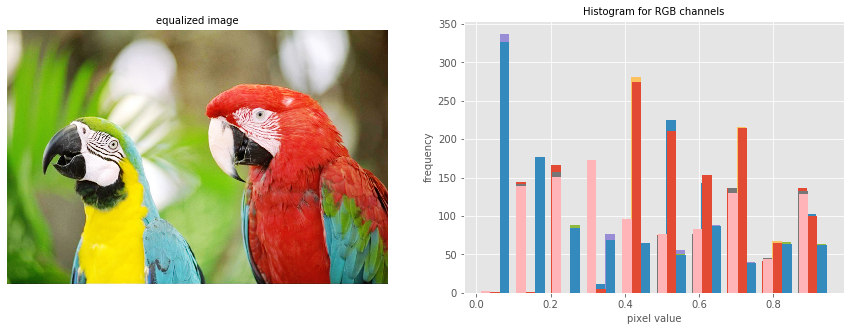

In [60]:
from skimage import data, img_as_float
from skimage import exposure, io

# Equalized Histogram
img_eq = exposure.equalize_hist(img)

# Plot the image
plot_hist(img, img_eq)

C:\Users\varun\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


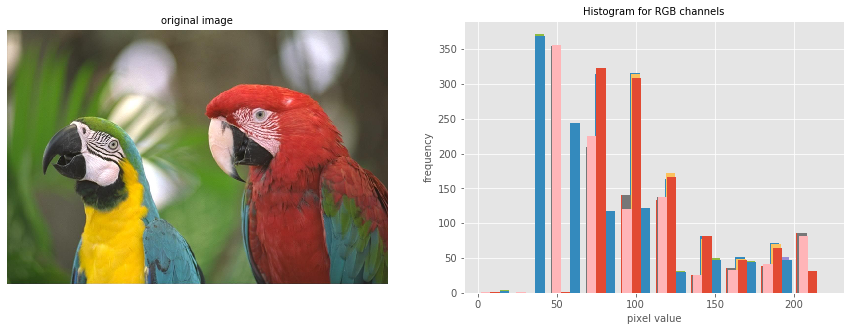

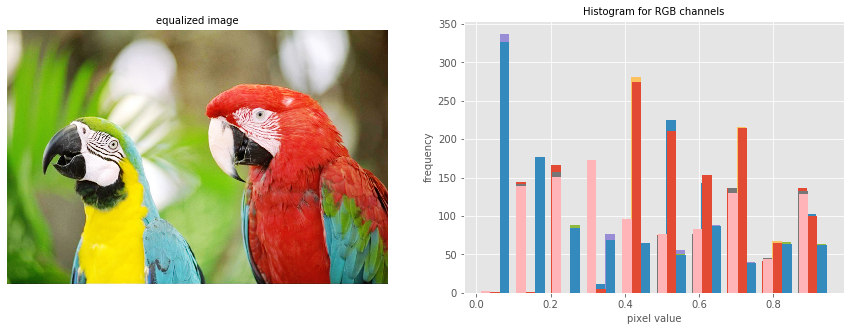

In [61]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Plot the image
plot_hist(img, img_eq)

We can see that the adaptive equalization gives a comparatively softer image as compared to normal equalization.

**4. Contrast Stretching**

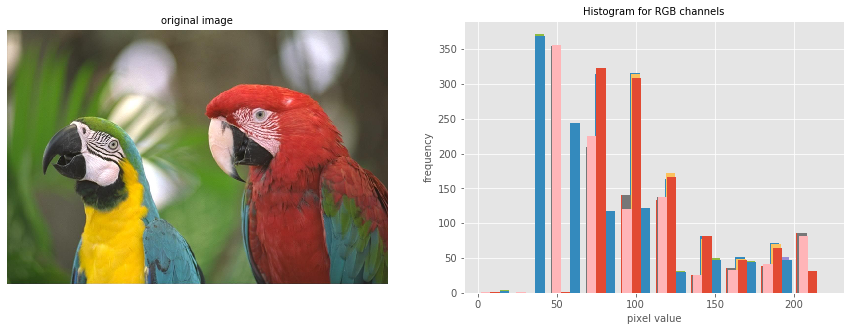

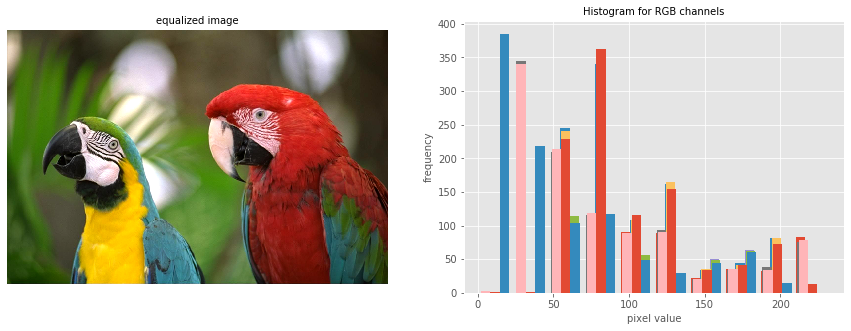

In [63]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

plot_hist(img, img_rescale)

This increases the contrast of the image, The darkers become a bit darker and highlights are toned down a bit also increasing the saturation as a side effect.